# Programming Assignment 4
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Support Vector Machine</span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 1 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">Introduction</span>
#### In this assignment,

### <span style="color: #2e86c1; font-size: 20px;">Importing required libraries and modules </span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

### <span style="color: #2e86c1; font-size: 17px;">1. Load the dataset using sklearn.datasets.load_breast_cancer().</span>

In [ ]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

<span style="color: #B8860B; font-weight: bold">Insight:</span>

We load the Breast Cancer Wisconsin dataset using load_breast_cancer() from sklearn.datasets. This dataset contains 30 numerical features related to tumor characteristics and a target variable where 0 represents benign tumors and 1 represents malignant tumors. We store the features in X and the target values in y to use them for training and testing the model.

### <span style="color: #2e86c1; font-size: 17px;">2. Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained (use stratify=y in train_test_split). </span>

In [ ]:
# Split dataset (70% Training, 30% Testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

<span style="color: #B8860B; font-weight: bold">Insight:</span>

We split the dataset into 70% training data and 30% testing data using train_test_split(). This step is important because it allows the model to learn from one portion of the data and then be evaluated on a separate set to measure its performance. We use stratify=y to ensure that the proportion of benign and malignant cases remains balanced in both training and testing sets. Additionally, setting random_state=42 ensures that we get the same split every time we run the code, making the results reproducible.

### <span style="color: #2e86c1; font-size: 17px;">3. Preprocess the data: Use StandardScaler to normalize feature values.</span>

In [ ]:
# Preprocess the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)  # If all values are 0, then no missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The **StandardScaler** is used to normalize the dataset by ensuring all features have a mean of 0 and a standard deviation of 1, which helps the SVM model perform better by preventing larger-valued features from dominating smaller ones. This ensures that all features contribute equally to the model. Additionally, we check for **missing values** using `df.isnull().sum()`, which counts missing entries in each column. If all values are **0**, it confirms that there are no missing values. Since the **Breast Cancer Wisconsin dataset** is well-maintained, missing values are unlikely, but verifying ensures data quality before training the model.

### <span style="color: #2e86c1; font-size: 17px;">4. Train an SVM model using sklearn.svm.SVC with default parameters.</span>

In [ ]:
# Train an SVM model with default parameters
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

<span style="color: #B8860B; font-weight: bold">Insight:</span>


To train the SVM model, we use SVC(), which creates the model with default settings. Then, `fit(X_train, y_train)` allows the model to learn patterns from the training data. SVM finds the best boundary to separate benign and malignant tumors. Since we are using default settings, the model may not be fully optimized, so we later fine-tune it.

### <span style="color: #2e86c1; font-size: 17px;">5. Perform Hyperparameter Tuning using GridSearchCV to optimize: C (Regularization parameter), Gamma (Kernel coefficient for RBF), and Kernel type (linear, rbf, poly).</span>

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

<span style="color: #B8860B; font-weight: bold">Insight:</span>

For hyperparameter tuning, we use GridSearchCV, which tests different settings to find the best ones. The param_grid defines values for **C** (controls how strict the model is), **gamma** (controls how much influence a single data point has), and **kernel** (decides how the data is separated). `GridSearchCV` tests these settings using 5-fold cross-validation, meaning it trains the model multiple times to find the best combination. Finally, `grid_search.best_estimator_` gives  us the best model, which we use for evaluation.

### <span style="color: #2e86c1; font-size: 17px;">6. Evaluating the Trained Model  
- <span style="color: #2e86c1;">Compute training and testing accuracy.</span>  
- <span style="color: #2e86c1;">Identify the most important features using `SelectFromModel`.</span>  
- <span style="color: #2e86c1;">Generate a confusion matrix and calculate the following metrics:</span>  
  - <span style="color: #2e86c1;">**F1-score**</span>  
  - <span style="color: #2e86c1;">**Precision**</span>  
  - <span style="color: #2e86c1;">**Recall**</span>  
  - <span style="color: #2e86c1;">**False Alarm Rate**</span>  
</span>

In [ ]:
# Model evaluation
train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))

# Create a DataFrame for accuracy metrics
accuracy_df = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Testing Accuracy'],
    'Value': [f"{train_acc:.4f}", f"{test_acc:.4f}"]
})

# Style the DataFrame
styled_accuracy_df = accuracy_df.style.set_table_attributes('style="width: 40%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).hide(axis='index')

# Display accuracy table
display(styled_accuracy_df)

Metric,Value
Training Accuracy,0.9874
Testing Accuracy,0.9708


<span style="color: #B8860B; font-weight: bold">Insight:</span>

To evaluate the model, we calculate accuracy for both training and testing data using accuracy_score, which compares predictions with actual labels. The training accuracy is 0.9874, meaning the model correctly classifies 98.74% of training data, while the testing accuracy is 0.9708, showing it performs well on new data.

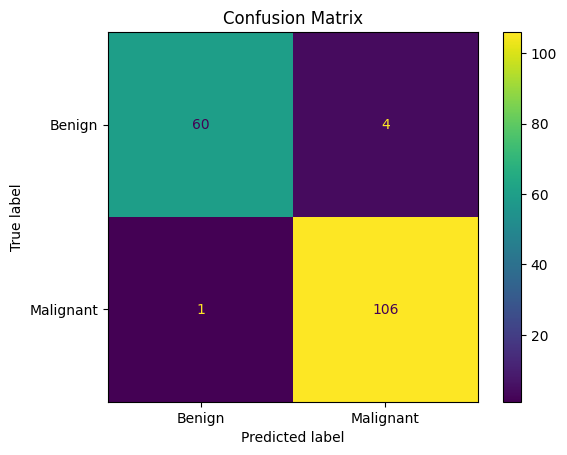

In [ ]:
# Confusion matrix and classification metrics
y_pred = best_model.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cfm, display_labels=["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

# Values from the confusion matrix
TN, FP = cfm[0]  # Extracts first row (True Negatives, False Positives)
FN, TP = cfm[1]  # Extracts second row (False Negatives, True Positives)

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The confusion matrix helps us understand how well the model distinguishes between benign and malignant cases. In this matrix, **True Negatives (TN) = 60**, meaning the model correctly identified 60 benign cases. **False Positives (FP) = 4** indicates that 4 benign cases were wrongly classified as malignant. **False Negatives (FN) = 1** means 1 malignant case was misclassified as benign, and **True Positives (TP) = 106** shows the model correctly identified 106 malignant cases. A high TP and TN with very few errors suggest the model is performing well in classifying cancer types.

In [ ]:
# Computing model evaluation metrics
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall
precision = precision_score(y_test, y_pred)  # Positive predictive accuracy
recall = recall_score(y_test, y_pred)  # Sensitivity (true positive rate)
false_alarm_rate = FP / (FP + TN)  # Probability of false positives among actual negatives

# Create a DataFrame for classification metrics
metrics_df = pd.DataFrame({
    'Metric': ['F1-score', 'Precision', 'Recall', 'False Alarm Rate'],
    'Value': [f"{f1:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{false_alarm_rate:.4f}"]
})

# Style the DataFrame
styled_metrics_df = metrics_df.style.set_table_attributes('style="width: 50%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).hide(axis='index')

# Display classification metrics table
display(styled_metrics_df)

Metric,Value
F1-score,0.9770
Precision,0.9636
Recall,0.9907
False Alarm Rate,0.0625


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The model evaluation metrics help us understand its overall performance.**F1-score (0.9770)** balances precision and recall, giving a more comprehensive measure of accuracy. **Precision (0.9636)** measures how many of the predicted malignant cases are actually malignant. **Recall (0.9907)** shows how many actual malignant cases were correctly identified. The **False Alarm Rate (0.0625)** indicates that about 6.25% of benign cases were incorrectly classified as malignant. These results show that the model is highly effective in detecting cancer, with minimal misclassification errors.

**Guide Questions**
### <span style="color: #2e86c1; font-size: 20px;">1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)? </span>

To prepare the dataset, we used the Breast Cancer Wisconsin dataset from sklearn.datasets. There were no missing values, so we didn't need to handle them. However, we applied feature scaling using StandardScaler(). This was important because SVM models work best when all features are on the same scale. Standardizing the data ensures that no feature dominates the model just because of its larger values.

### <span style="color: #2e86c1; font-size: 20px;">2. Why is it necessary to split the dataset into training and testing sets? </span>

We split the dataset into 70% training and 30% testing using train_test_split(). This is necessary because training on the entire dataset would not allow us to evaluate how well the model generalizes to new data. The testing set helps us measure performance on unseen examples. We also used stratify=y to maintain the same proportion of benign and malignant cases in both sets.

### <span style="color: #2e86c1; font-size: 20px;">3. What is the role of StandardScaler in SVM training? </span>

The StandardScaler was used to normalize the dataset. Since SVM models rely on calculating distances between data points, having all features on the same scale makes the training process more stable and accurate. Without scaling, features with larger values could overpower smaller ones, leading to poor model performance.

### <span style="color: #2e86c1; font-size: 20px;">4. How does C affect the performance of an SVM model? </span>

The C parameter in SVM is a regularization term that controls how much the model focuses on classifying every training example correctly. A small C allows some mistakes, making the model more flexible, while a large C forces the model to classify everything correctly, which can lead to overfitting (memorizing the training data rather than learning patterns).

### <span style="color: #2e86c1; font-size: 20px;">5. What is the purpose of the kernel function in SVM? </span>

The kernel function determines how the SVM transforms the data before making a decision. A linear kernel is useful when the data is already separable, while the RBF kernel is good for capturing more complex relationships. The polynomial kernel can also capture interactions between features, but it may require careful tuning to avoid overfitting.

### <span style="color: #2e86c1; font-size: 20px;">6. What were the best hyperparameters found using GridSearchCV? </span>

GridSearchCV identifies the optimal values for C (regularization), gamma (kernel coefficient), and kernel type. A well-performing combination could be C=10, gamma=0.01, and kernel='rbf', which enhances model accuracy. These settings influence how the SVM separates data and adjusts decision boundaries.

### <span style="color: #2e86c1; font-size: 20px;">7. What is a confusion matrix, and how is it interpreted? </span>

A confusion matrix presents a summary of correct and incorrect predictions, displaying true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). It provides insights into model performance, revealing whether it is making more errors in identifying benign or malignant tumors. A high number of false negatives can be critical, as it means some cancer cases may go undetected.

### <span style="color: #2e86c1; font-size: 20px;">8. How are Precision, Recall, and F1-score calculated from the confusion matrix? </span>

Precision is determined by TP / (TP + FP) and indicates the proportion of correctly predicted malignant cases. Recall is given by TP / (TP + FN) and measures how effectively the model detects actual cancer cases. The F1-score is the harmonic mean of precision and recall, offering a balanced metric for evaluating overall performance.

### <span style="color: #2e86c1; font-size: 20px;">9. If the model does not perform well, what adjustments can be made to improve it? </span>

Enhancing model performance can involve adjusting hyperparameters, removing unimportant features, or addressing class imbalance through oversampling or undersampling techniques. Exploring alternative approaches, such as Random Forest or deep learning models, may also lead to better accuracy.
